In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [26]:
df=pd.read_csv("Galton_processed.txt",sep='\t')
node_names=df.columns
X=df.to_numpy()
#scaler = StandardScaler()
#X=scaler.fit_transform(X)

In [27]:
X

array([[  1. ,  78.5,  67. ,   0. ,  73.2],
       [  1. ,  78.5,  67. ,   1. ,  69.2],
       [  1. ,  78.5,  67. ,   1. ,  69. ],
       ...,
       [203. ,  62. ,  66. ,   1. ,  61. ],
       [204. ,  62.5,  63. ,   0. ,  66.5],
       [204. ,  62.5,  63. ,   1. ,  57. ]])

In [28]:
df

Family ID  Father Height  Mother Height  Gender  Height
0            1           78.5           67.0       0    73.2
1            1           78.5           67.0       1    69.2
2            1           78.5           67.0       1    69.0
3            1           78.5           67.0       1    69.0
4            2           75.5           66.5       0    73.5
..         ...            ...            ...     ...     ...
885        203           62.0           66.0       0    64.0
886        203           62.0           66.0       1    62.0
887        203           62.0           66.0       1    61.0
888        204           62.5           63.0       0    66.5
889        204           62.5           63.0       1    57.0

[890 rows x 5 columns]

In [29]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)

Computing kernel matrix
Performing eigenvalue decomposition on matrix of shape (890, 890)


PCA reduced dimension to 890
Family ID has ancestors with linear kernel (Z test=0.01)
['Father Height'] 

PCA reduced dimension to 890
Father Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 

PCA reduced dimension to 890
Mother Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 

PCA reduced dimension to 890
Gender has ancestors with linear kernel (Z test=0.01)
['Height'] 

PCA reduced dimension to 890
Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 



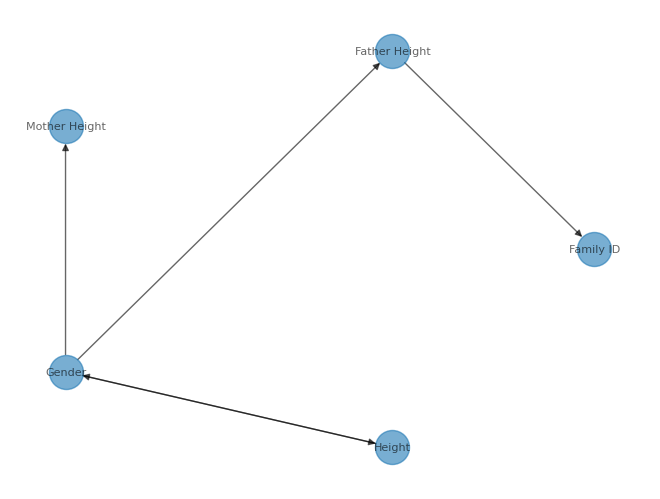

In [30]:
for node in graph_discovery.names:
    graph_discovery.find_ancestors(node,1e-1,kPCA='fixed number',number_of_eigenvectors=890)
graph_discovery.plot_graph()